# Capped Trend Accumulator 評価

### プロジェクトのルートのパスを通す

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

### ライブラリを一括インポート

In [15]:
import os

import matplotlib.dates as mdates
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from funcs.ios import get_excel_sheet
from modules.technical import MovingAverage
from funcs.technical_backup import MovingRange, CappedTrendAccumulator
from funcs.tide import conv_datetime_from_timestamp

### Matplotlib のフォント設定（オプション）

In [3]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 10

## ティックデータの取得

In [4]:
# excel = "ticks_20251212.xlsx"
# excel = "ticks_20251229.xlsx"
excel = "ticks_20251230.xlsx"
code = "7011"  # 銘柄コード

path_dir = os.path.join("..", "collection")
path_excel = os.path.join(path_dir, excel)
df = get_excel_sheet(path_excel, code)
df

,Time,Price,Volume
0,1.767053e+09,3850,314100
1,1.767053e+09,3850,314100
2,1.767053e+09,3857,344900
3,1.767053e+09,3857,344900
4,1.767053e+09,3847,371300
...,...,...,...
19439,1.767076e+09,3844,8350600
19440,1.767076e+09,3844,8350600
19441,1.767076e+09,3844,8350600
19442,1.767076e+09,3844,8361300


In [5]:
df.index = [pd.to_datetime(conv_datetime_from_timestamp(ts)) for ts in df["Time"]]
df

,Time,Price,Volume
2025-12-30 09:00:04,1.767053e+09,3850,314100
2025-12-30 09:00:05,1.767053e+09,3850,314100
2025-12-30 09:00:06,1.767053e+09,3857,344900
2025-12-30 09:00:07,1.767053e+09,3857,344900
2025-12-30 09:00:08,1.767053e+09,3847,371300
...,...,...,...
2025-12-30 15:24:45,1.767076e+09,3844,8350600
2025-12-30 15:24:46,1.767076e+09,3844,8350600
2025-12-30 15:24:47,1.767076e+09,3844,8350600
2025-12-30 15:24:48,1.767076e+09,3844,8361300


## MR と CTA

In [6]:
# MR and CTA
period = 30
mr = MovingRange(window_size=period)
df["MR"] = [mr.update(v) for v in df["Price"]]
cta = CappedTrendAccumulator(window_size=period)
df["CTA"] = [cta.update(v) for v in df["Price"]]
df

,Time,Price,Volume,MR,CTA
2025-12-30 09:00:04,1.767053e+09,3850,314100,0,0.0
2025-12-30 09:00:05,1.767053e+09,3850,314100,0,0.0
2025-12-30 09:00:06,1.767053e+09,3857,344900,7,2.0
2025-12-30 09:00:07,1.767053e+09,3857,344900,7,2.0
2025-12-30 09:00:08,1.767053e+09,3847,371300,10,0.0
...,...,...,...,...,...
2025-12-30 15:24:45,1.767076e+09,3844,8350600,3,1.0
2025-12-30 15:24:46,1.767076e+09,3844,8350600,3,1.0
2025-12-30 15:24:47,1.767076e+09,3844,8350600,3,1.0
2025-12-30 15:24:48,1.767076e+09,3844,8361300,3,1.0


In [18]:
# MA1, MA2
period1 = 60
ma1 = MovingAverage(window_size=period1)
df["MA1"] = [ma1.update(v) for v in df["Price"]]
period2 = 540
ma2 = MovingAverage(window_size=period2)
df["MA2"] = [ma2.update(v) for v in df["Price"]]
df

,Time,Price,Volume,MR,CTA,MA1,MA2
2025-12-30 09:00:04,1.767053e+09,3850,314100,0,0.0,3850.000000,3850.000000
2025-12-30 09:00:05,1.767053e+09,3850,314100,0,0.0,3850.000000,3850.000000
2025-12-30 09:00:06,1.767053e+09,3857,344900,7,2.0,3852.333333,3852.333333
2025-12-30 09:00:07,1.767053e+09,3857,344900,7,2.0,3853.500000,3853.500000
2025-12-30 09:00:08,1.767053e+09,3847,371300,10,0.0,3852.200000,3852.200000
...,...,...,...,...,...,...,...
2025-12-30 15:24:45,1.767076e+09,3844,8350600,3,1.0,3845.450000,3845.161111
2025-12-30 15:24:46,1.767076e+09,3844,8350600,3,1.0,3845.433333,3845.157407
2025-12-30 15:24:47,1.767076e+09,3844,8350600,3,1.0,3845.400000,3845.153704
2025-12-30 15:24:48,1.767076e+09,3844,8361300,3,1.0,3845.383333,3845.150000


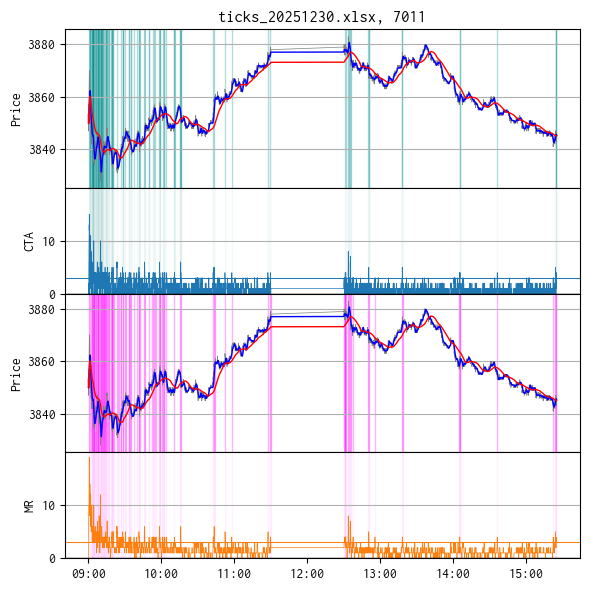

In [24]:
threshold = 3
x = df.index

fig = plt.figure(figsize=(6, 6))
n = 4
ax = dict()
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[1.5 if i % 2 == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis

ax[0].plot(df["Price"], linewidth=0.5, color="gray", alpha=1)
ax[0].plot(df["MA1"], linewidth=1, color="blue", alpha=1)
ax[0].plot(df["MA2"], linewidth=1, color="red", alpha=1)
ax[0].set_ylabel("Price")
ax[0].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax[0].set_title(f"{excel}, {code}")
ax[0].grid(axis="y")

ax[1].plot(df["CTA"], linewidth=0.5, color="C0")
ax[1].axhline(y=threshold, linewidth=0.75, color="C0")
ax[1].axhline(0, linewidth=0.25, color="black")
ax[1].set_ylabel("CTA")
ax[1].grid(axis="y")
y = df["CTA"]
ax[0].fill_between(
    x, 0, 1,
    where=(threshold < y),
    color="darkcyan",
    alpha=0.3,
    transform=ax[0].get_xaxis_transform(),
)
ax[1].fill_between(
    x, 0, 1,
    where=(threshold < y),
    color="darkcyan",
    alpha=0.05,
    transform=ax[1].get_xaxis_transform(),
)

ax[2].plot(df["Price"], linewidth=0.5, color="gray", alpha=1)
ax[2].plot(df["MA1"], linewidth=1, color="blue", alpha=1)
ax[2].plot(df["MA2"], linewidth=1, color="red", alpha=1)
ax[2].set_ylabel("Price")
ax[2].grid(axis="y")

ax[3].plot(df["MR"], linewidth=0.5, color="C1")
ax[3].axhline(y=threshold, linewidth=0.75, color="C1")
ax[3].axhline(0, linewidth=0.25, color="black")
ax[3].set_ylabel("MR")
ax[3].grid(axis="y")
y = df["MR"]
ax[2].fill_between(
    x, 0, 1,
    where=(threshold < y),
    color="magenta",
    alpha=0.3,
    transform=ax[2].get_xaxis_transform(),
)
ax[3].fill_between(
    x, 0, 1,
    where=(threshold < y),
    color="magenta",
    alpha=0.05,
    transform=ax[3].get_xaxis_transform(),
)

_, y_max_1 = ax[1].get_ylim()
_, y_max_2 = ax[3].get_ylim()
y_max = max(y_max_1, y_max_2)
ax[1].set_ylim(0, y_max)
ax[3].set_ylim(0, y_max)

plt.tight_layout()
output = os.path.join("..", "tmp", "mr_cta.png")
plt.savefig(output)
plt.show()

In [8]:
df_hist = pd.DataFrame(df[["MR", "CTA"]].stack()).reset_index()
df_hist.columns = ["Timpestamp", "idx", "value_ma"]
df_hist = df_hist.sort_values(["value_ma", "idx"])
df_hist["value_ma"] = df_hist["value_ma"].astype(int).astype(str)

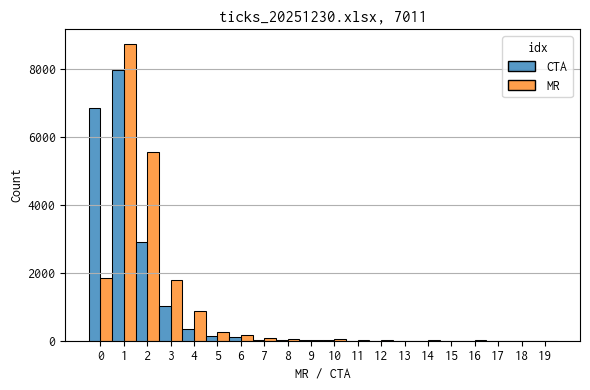

In [10]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=df_hist, x="value_ma", hue="idx", multiple="dodge", ax=ax)
ax.set_title(f"{excel}, {code}")
ax.set_xlabel("MR / CTA")
ax.grid(axis="y")

plt.tight_layout()
output = os.path.join("..", "tmp", "hist_mr_cta.png")
plt.savefig(output)
plt.show()

In [11]:
def compare_raw_distributions(df, col_mr="MR", col_cta="CTA", bins=None):
    import numpy as np

    mr = df[col_mr].values
    cta = df[col_cta].values

    # ビンが指定されていなければ自動生成（整数ビン）
    if bins is None:
        low = int(min(mr.min(), cta.min()))
        high = int(max(mr.max(), cta.max())) + 1
        bins = np.arange(low, high + 1)

    # ヒストグラム化
    hist_mr, _ = np.histogram(mr, bins=bins)
    hist_cta, _ = np.histogram(cta, bins=bins)

    # 確率分布に正規化
    p_mr = hist_mr / hist_mr.sum()
    p_cta = hist_cta / hist_cta.sum()

    # 指標
    L1 = np.abs(p_mr - p_cta).sum()
    overlap = np.minimum(p_mr, p_cta).sum()

    return L1, overlap, bins, p_mr, p_cta

compare_raw_distributions(df)

(np.float64(0.5140917506685866),
 np.float64(0.7429541246657068),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([9.45793047e-02, 4.48673113e-01, 2.85023658e-01, 9.13906604e-02,
        4.44867311e-02, 1.34745937e-02, 9.00020572e-03, 3.85723102e-03,
        2.52005760e-03, 1.13145443e-03, 1.85147089e-03, 1.69718165e-03,
        5.65727217e-04, 1.02859494e-04, 3.60008229e-04, 2.05718988e-04,
        4.62867723e-04, 2.57148735e-04, 2.57148735e-04, 1.02859494e-04]),
 array([3.51522321e-01, 4.09689364e-01, 1.49969142e-01, 5.30240691e-02,
        1.84632792e-02, 7.35445382e-03, 5.04011520e-03, 1.74861140e-03,
        1.13145443e-03, 7.20016458e-04, 4.11437976e-04, 1.02859494e-04,
        2.05718988e-04, 2.05718988e-04, 3.08578482e-04, 1.02859494e-04,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

In [13]:
df["MR"].describe()

count    19444.000000
mean         1.721354
std          1.477293
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: MR, dtype: float64

In [14]:
df["CTA"].describe()

count    19444.00000
mean         1.05359
std          1.20646
min          0.00000
25%          0.00000
50%          1.00000
75%          1.00000
max         15.00000
Name: CTA, dtype: float64